In [72]:
from identification import get_starting_points, get_vessel_graph

In [109]:
from PIL import Image
from sklearn import preprocessing
from skimage import io, morphology
from skimage.filters import gaussian

import numpy as np
import networkx as nx

In [110]:
from matplotlib import pyplot as plt

In [111]:
from skimage.color import rgb2gray
from skimage import util 

In [112]:
I = Image.open('test2d.png').convert('RGB')
print(I.format)
print(I.size)
print(I.mode)

None
(317, 308)
RGB


In [121]:
img = np.asarray(I)
img_gray = rgb2gray(img)

In [122]:
img_bin = preprocessing.Binarizer(threshold=0.34).transform(img_gray)
img_bin = util.invert(img_bin).astype(np.uint8)

In [128]:
img_gauss = gaussian(img_bin, sigma=1)

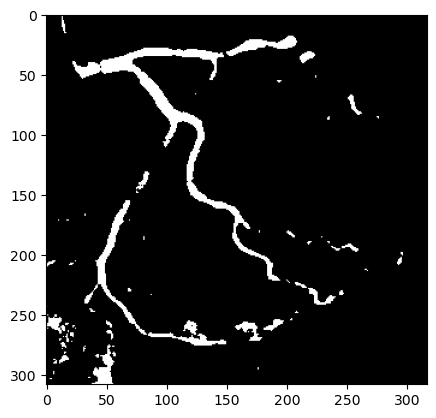

In [129]:
plt.imshow(img_bin, cmap='gray')
plt.show()

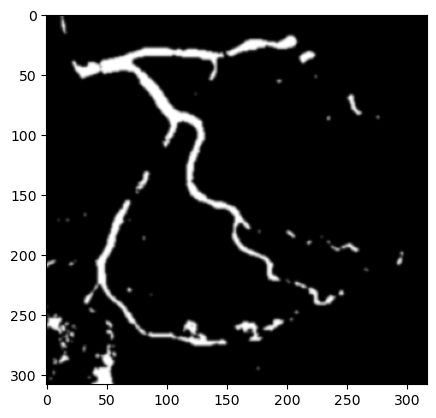

In [130]:
plt.imshow(img_gauss, cmap='gray')
plt.show()

In [69]:
from scipy.ndimage import distance_transform_edt

In [70]:
img_edt = distance_transform_edt(img_bin)

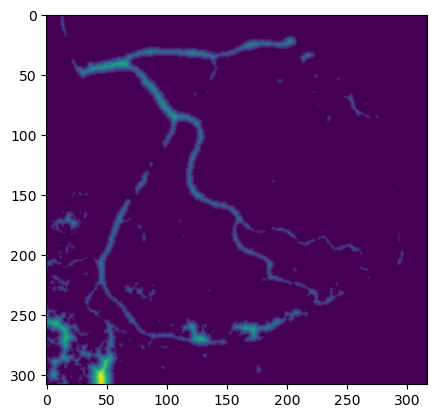

In [71]:
plt.imshow(img_edt)
plt.show()

In [78]:
bounds = int(np.ceil(np.max(img_edt)))

img_bin = np.pad(img_bin, ((bounds,bounds), (bounds,bounds)), 'constant')

In [79]:
graph = get_vessel_graph(img_bin)

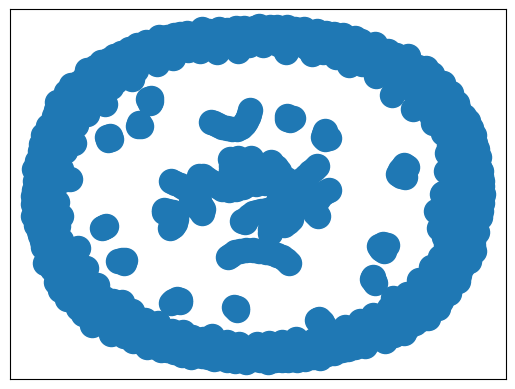

In [86]:
nx.draw_networkx(graph, with_labels=False)

In [87]:
graph.nodes

NodeView(((310, 58), (301, 62), (306, 49), (316, 50), (269, 20), (274, 26), (280, 28), (287, 28), (293, 27), (297, 26), (300, 22), (298, 31), (301, 29), (301, 18), (305, 19), (299, 14), (308, 18), (312, 18), (316, 21), (282, 141), (278, 135), (285, 147), (285, 150), (273, 134), (272, 129), (269, 131), (274, 184), (273, 177), (273, 191), (281, 183), (273, 195), (271, 199), (269, 196), (269, 203), (267, 207), (265, 204), (265, 210), (272, 172), (273, 168), (53, 77), (53, 70), (47, 81), (56, 83), (58, 86), (60, 88), (62, 90), (65, 93), (68, 96), (71, 99), (75, 102), (80, 105), (85, 108), (89, 111), (93, 114), (97, 118), (97, 123), (102, 118), (106, 117), (109, 116), (112, 115), (115, 113), (118, 111), (97, 128), (99, 132), (101, 136), (105, 138), (108, 140), (111, 140), (115, 140), (119, 139), (122, 137), (125, 137), (127, 135), (130, 134), (134, 133), (137, 132), (141, 131), (144, 130), (147, 131), (150, 131), (154, 132), (157, 134), (161, 136), (163, 140), (165, 142), (167, 145), (168, 